In [46]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1200
png_renderer.height = 600

pio.renderers.default = "png"

In [2]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
survey=pd.read_csv('fact_survey_responses.csv')
age=pd.read_csv('dim_repondents.csv')
city=pd.read_csv('dim_cities.csv')

In [4]:
survey.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [5]:
survey.shape

(10000, 23)

In [6]:
survey.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [7]:
age.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [8]:
age.shape

(10000, 5)

In [9]:
city

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [10]:
city.shape

(10, 3)

In [11]:
age_merged=age.merge(city, on='City_ID', how ='left')
age_merged.head(2)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2


In [12]:
all_data=survey.merge(age_merged,on='Respondent_ID', how='left')
all_data.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2


In [13]:
all_data.shape

(10000, 29)

In [14]:
data=all_data.copy()

In [15]:
data=data.drop(['Response_ID','Respondent_ID','City_ID','Name','Tier'],axis=1)
data.head()

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,...,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Age,Gender,City
0,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,...,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,15-18,Female,Ahmedabad
1,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,...,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,19-30,Male,Pune
2,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,...,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,15-18,Male,Hyderabad
3,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,...,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,31-45,Female,Bangalore
4,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,...,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,19-30,Female,Lucknow


In [16]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Consume_frequency               10000 non-null  object
 1   Consume_time                    10000 non-null  object
 2   Consume_reason                  10000 non-null  object
 3   Heard_before                    10000 non-null  object
 4   Brand_perception                10000 non-null  object
 5   General_perception              10000 non-null  object
 6   Tried_before                    10000 non-null  object
 7   Taste_experience                10000 non-null  int64 
 8   Reasons_preventing_trying       10000 non-null  object
 9   Current_brands                  10000 non-null  object
 10  Reasons_for_choosing_brands     10000 non-null  object
 11  Improvements_desired            10000 non-null  object
 12  Ingredients_expected            10000 non-null 

In [18]:
data.describe()

,Taste_experience
count,10000.000000
mean,3.281900
std,1.239752
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [19]:
data['Taste_experience'].value_counts()

3    2957
4    2479
5    1986
2    1524
1    1054
Name: Taste_experience, dtype: int64

In [20]:
data['Gender'].value_counts()

Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64

In [21]:
for col in data.columns:
    print(col)
    print(data[col].nunique())
    print(data[col].unique())
    print('---- ----'*8)

Consume_frequency
5
['2-3 times a week' '2-3 times a month' 'Rarely' 'Daily' 'Once a week']
---- -------- -------- -------- -------- -------- -------- -------- ----
Consume_time
4
['To stay awake during work/study' 'Throughout the day' 'Before exercise'
 'For mental alertness']
---- -------- -------- -------- -------- -------- -------- -------- ----
Consume_reason
5
['Increased energy and focus' 'To boost performance' 'To combat fatigue'
 'To enhance sports performance' 'Other']
---- -------- -------- -------- -------- -------- -------- -------- ----
Heard_before
2
['Yes' 'No']
---- -------- -------- -------- -------- -------- -------- -------- ----
Brand_perception
3
['Neutral' 'Positive' 'Negative']
---- -------- -------- -------- -------- -------- -------- -------- ----
General_perception
4
['Not sure' 'Dangerous' 'Effective' 'Healthy']
---- -------- -------- -------- -------- -------- -------- -------- ----
Tried_before
2
['No' 'Yes']
---- -------- -------- -------- -------- ------

In [22]:
replace_dict= {1:'poor',2:'Below average', 3:'Average', 4:'Good', 5:'Excellent'}

In [23]:
data['Taste_experience'] = data['Taste_experience'].replace(replace_dict)

In [24]:
data['Taste_experience'].unique()

array(['Excellent', 'Below average', 'Good', 'Average', 'poor'],
      dtype=object)

In [25]:
data.isnull().sum()

Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
Age                               0
Gender                            0
City                              0
dtype: int64

In [26]:
colors = {
    'orange': 'rgb(230, 81, 0)',
    'pink': 'rgb(173, 20, 87)',
    'blue': 'rgb(48, 63, 159)',
    'sky' : 'rgb(21, 101, 192)',
    'green': 'rgb(0, 131, 143)',
    'gray': 'rgb(66, 66, 66)',
    'white':'rgb(255,255,255)'
}

In [27]:
data['Gender'].value_counts()['Male']

6038

In [28]:
data['Gender'].value_counts()['Female']

3455

In [29]:
data['Gender'].value_counts()['Non-binary']

507

In [30]:
male = data[data['Gender']=='Male']
female= data[data['Gender']=='Female']
nonbinary = data[data['Gender']=='Non-binary']

In [31]:
gender=data['Gender'].value_counts().reset_index()
gender

,index,Gender
0,Male,6038
1,Female,3455
2,Non-binary,507


In [32]:
test = data.groupby(['Taste_experience'])['Gender'].count().reset_index()
test = test.sort_values(by = 'Gender', ascending=False)
test
# test = test.rename(columns{'Taste_experience':'experience_catagory'})

,Taste_experience,Gender
0,Average,2957
3,Good,2479
2,Excellent,1986
1,Below average,1524
4,poor,1054


In [33]:
ave=data[data['Taste_experience']=='Average'].reset_index()
good=data[data['Taste_experience']=='Good'].reset_index()
ex = data[data['Taste_experience']=='Excellent'].reset_index()
bel_ave = data[data['Taste_experience']=='Below average'].reset_index()
poor= data[data['Taste_experience']=='poor'].reset_index()

In [34]:
all_genders = data['Gender'].unique()
gender_counts = {gender: [] for gender in all_genders}

for category_df in [ave, good, ex, bel_ave, poor]:
    for gender in all_genders:
        gender_counts[gender].append(category_df['Gender'].value_counts().get(gender, 0))
        
gender_counts

{'Female': [1014, 901, 680, 505, 355],
 'Male': [1774, 1461, 1204, 947, 652],
 'Non-binary': [169, 117, 102, 72, 47]}

In [35]:
colorso = {
    'Male': 'rgb(230, 81, 0)',
    'Female': 'rgb(173, 20, 87)',
    'Non-binary': 'rgb(48, 63, 159)',
    'Other Gender': 'rgb(255, 255, 255)'
}

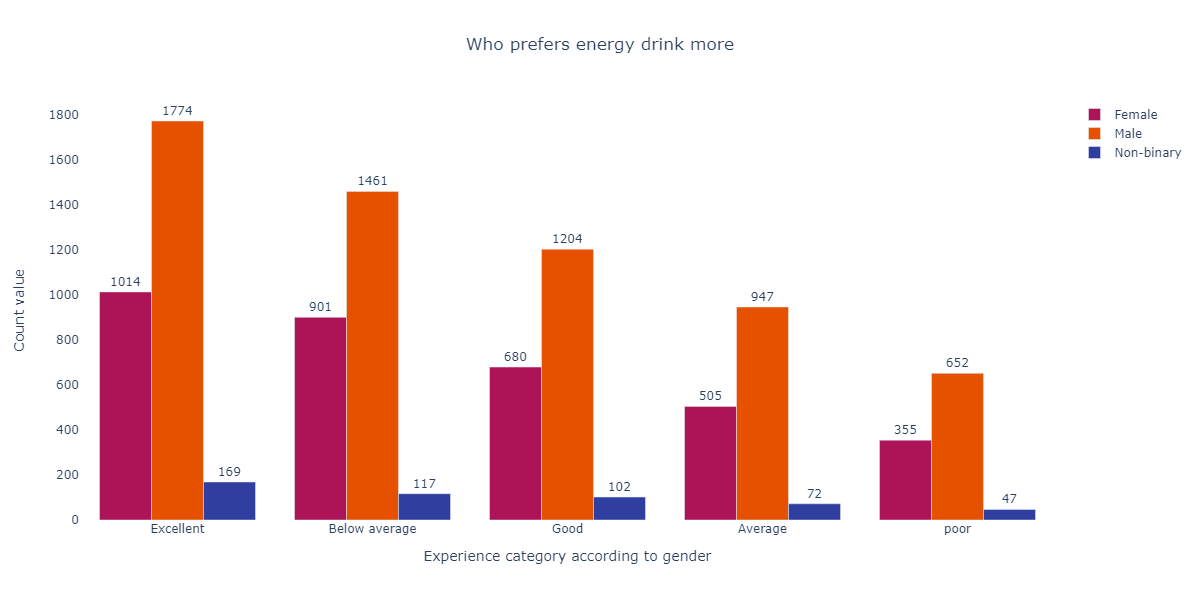

In [47]:
fig = go.Figure()

for gender in all_genders:
    fig.add_trace(
        go.Bar(x=data['Taste_experience'].unique(), y=gender_counts[gender],
               text=gender_counts[gender],
               textposition='outside',
               name=gender, marker=dict(color=colorso[gender]))
    )

fig.update_layout(title_text='Who prefers energy drink more', title_x=0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'],
                  barmode='group')

fig.update_xaxes(title_text='Experience category according to gender')
fig.update_yaxes(title_text='Count value')

fig.show()

In [48]:
data.head(2)

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,...,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Age,Gender,City
0,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,Excellent,Unfamiliar with the brand,Blue Bull,...,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,15-18,Female,Ahmedabad
1,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,Excellent,Not interested in energy drinks,Bepsi,...,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,19-30,Male,Pune


In [49]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [50]:
ingred=data['Ingredients_expected'].value_counts()
ingred_df=pd.DataFrame(ingred)
ingred_df = ingred_df.reset_index()
ingred_df.columns=['ingredient','count']
ingred_df

,ingredient,count
0,Caffeine,3896
1,Vitamins,2534
2,Sugar,2017
3,Guarana,1553


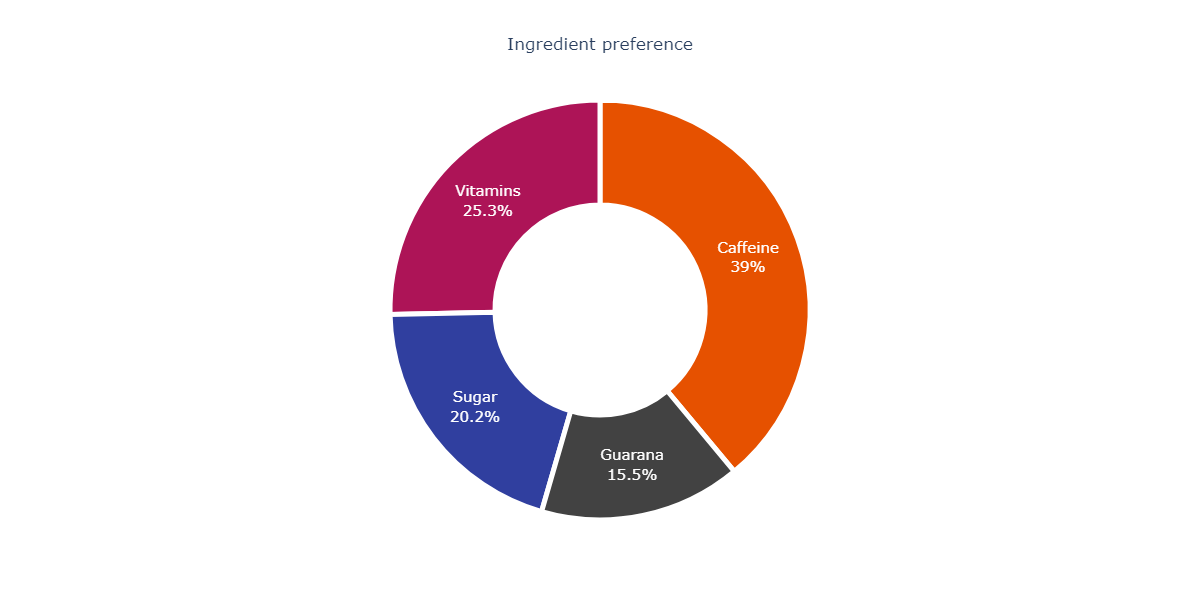

In [51]:
fig = go.Figure()

fig.add_trace(
    go.Pie(labels =ingred_df['ingredient'], values = ingred_df['count'])
)

fig.update_traces(textinfo='label+percent',textfont_size=15,
                  hole = 0.5,
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue'],colors['gray']],
                              line = dict(color=colors['white'],width=5)),
                  showlegend=False)

fig.update_layout(title_text='Ingredient preference', title_x=0.5)

fig.show()

In [52]:
packaging=data['Packaging_preference'].value_counts()
packaging_df=pd.DataFrame(packaging).reset_index()
packaging_df.columns=['package', 'count']
packaging_df

,package,count
0,Compact and portable cans,3984
1,Innovative bottle design,3047
2,Collectible packaging,1501
3,Eco-friendly design,983
4,Other,485


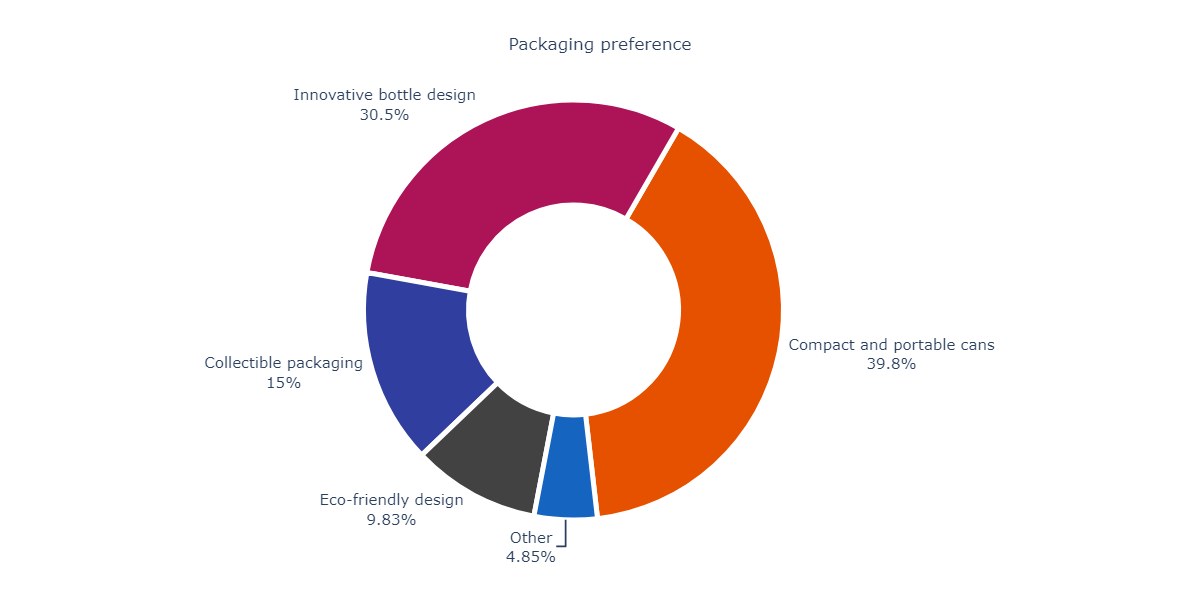

In [53]:
fig = go.Figure()

fig.add_trace(
    go.Pie(labels =packaging_df['package'], values = packaging_df['count'])
)

fig.update_traces(textinfo='label+percent',textfont_size=15,
                  hole = 0.5,
                  insidetextorientation='horizontal',
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue'],colors['gray'],colors['sky']],
                              line = dict(color=colors['white'],width=5)),
                  showlegend=False,
                  rotation = 30)

fig.update_layout(title_text='Packaging preference', title_x=0.5)

fig.show()

In [54]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [55]:
brands = data['Current_brands'].value_counts()
brands_df=pd.DataFrame(brands).reset_index()
brands_df.columns=['brand','count']
brands_df

,brand,count
0,Cola-Coka,2538
1,Bepsi,2112
2,Gangster,1854
3,Blue Bull,1058
4,CodeX,980
5,Sky 9,979
6,Others,479


In [56]:
brands_df['percentage'] = (brands_df['count']/brands_df['count'].sum())*100
brands_df

,brand,count,percentage
0,Cola-Coka,2538,25.38
1,Bepsi,2112,21.12
2,Gangster,1854,18.54
3,Blue Bull,1058,10.58
4,CodeX,980,9.80
5,Sky 9,979,9.79
6,Others,479,4.79


In [57]:
reason=data['Reasons_for_choosing_brands'].value_counts()
reason_df=pd.DataFrame(reason).reset_index()
reason_df.columns=['reason','count']
reason_df['percentage']=(reason_df['count']/reason_df['count'].sum())*100
reason_df

,reason,count,percentage
0,Brand reputation,2652,26.52
1,Taste/flavor preference,2011,20.11
2,Availability,1910,19.10
3,Effectiveness,1748,17.48
4,Other,1679,16.79


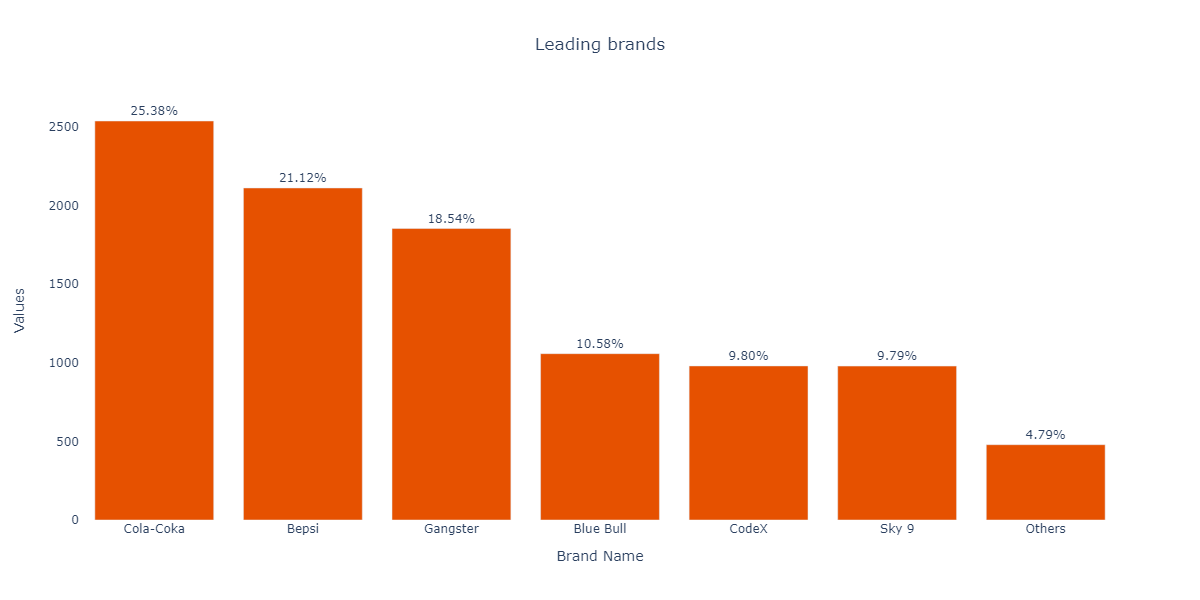

In [58]:
fig=go.Figure()

fig.add_trace(
    go.Bar(x=brands_df['brand'],y=brands_df['count'],
           text=brands_df['percentage'].apply(lambda x: f'{x:.2f}%'),
           textposition='outside')
)

fig.update_traces(marker=dict(color=colors['orange']))

fig.update_layout(title_text='Leading brands', title_x = 0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='Brand Name')
fig.update_yaxes(title_text='Values')

fig.show()

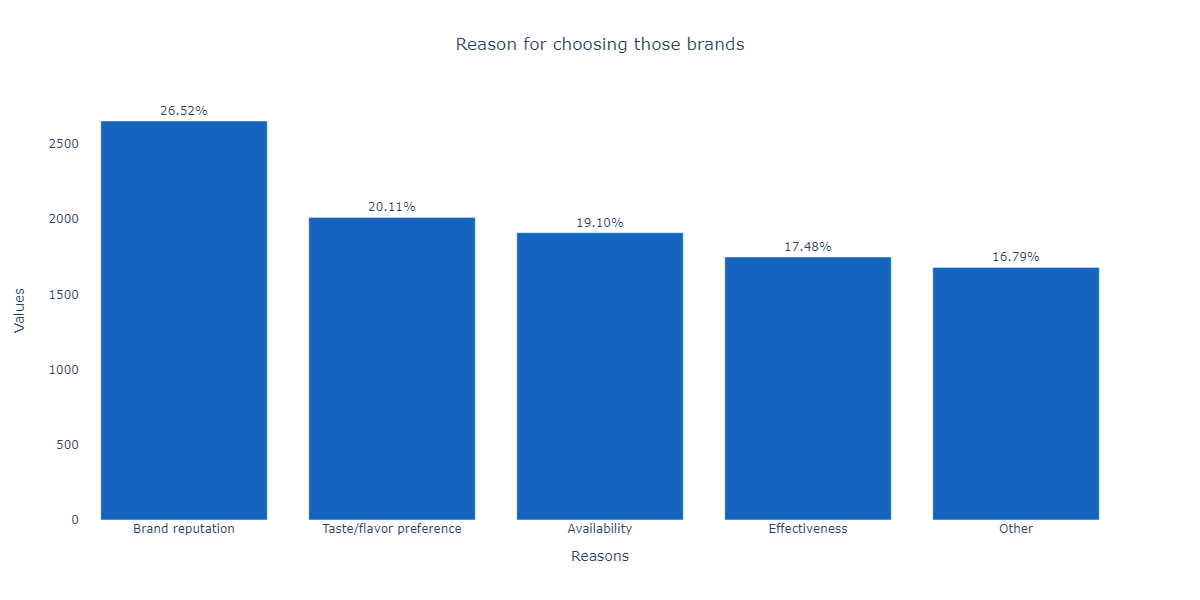

In [59]:
fig=go.Figure()

fig.add_trace(
    go.Bar(x=reason_df['reason'],y=reason_df['count'],
           text=reason_df['percentage'].apply(lambda x: f'{x:.2f}%'),
           textposition='outside')
)

fig.update_traces(marker=dict(color=colors['sky']))

fig.update_layout(title_text='Reason for choosing those brands', title_x = 0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='Reasons')
fig.update_yaxes(title_text='Values')

fig.show()

In [60]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [61]:
channel=data['Marketing_channels'].value_counts()
channel_df= pd.DataFrame(channel).reset_index()
channel_df.columns=['channel','count']
channel_df

,channel,count
0,Online ads,4020
1,TV commercials,2688
2,Outdoor billboards,1226
3,Other,1225
4,Print media,841


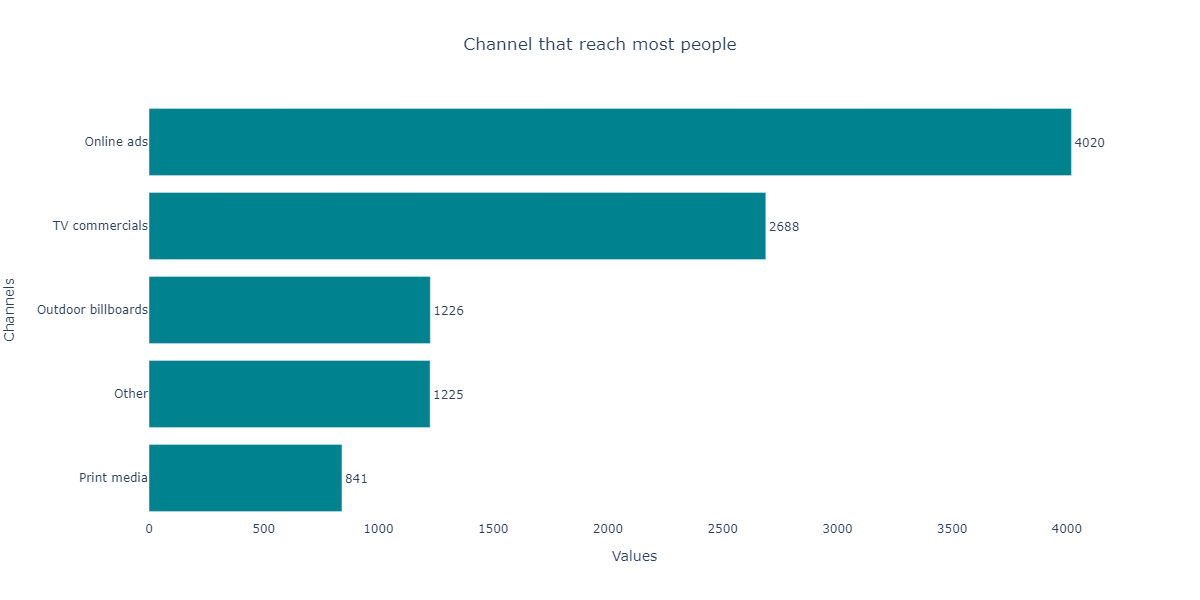

In [62]:
fig=go.Figure()

fig.add_trace(
    go.Bar(x=channel_df['count'],y=channel_df['channel'],
           text=channel_df['count'],
           textposition='outside',
           orientation='h')
)

fig.update_traces(marker=dict(color=colors['green']))

fig.update_layout(title_text='Channel that reach most people', title_x = 0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='Values')
fig.update_yaxes(title_text='Channels',
                 categoryorder='total ascending')

fig.show()

In [63]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [64]:
percep=data['Brand_perception'].value_counts()
percep_df= pd.DataFrame(percep).reset_index()
percep_df.columns=['perception','count']
percep_df

,perception,count
0,Neutral,5974
1,Positive,2257
2,Negative,1769


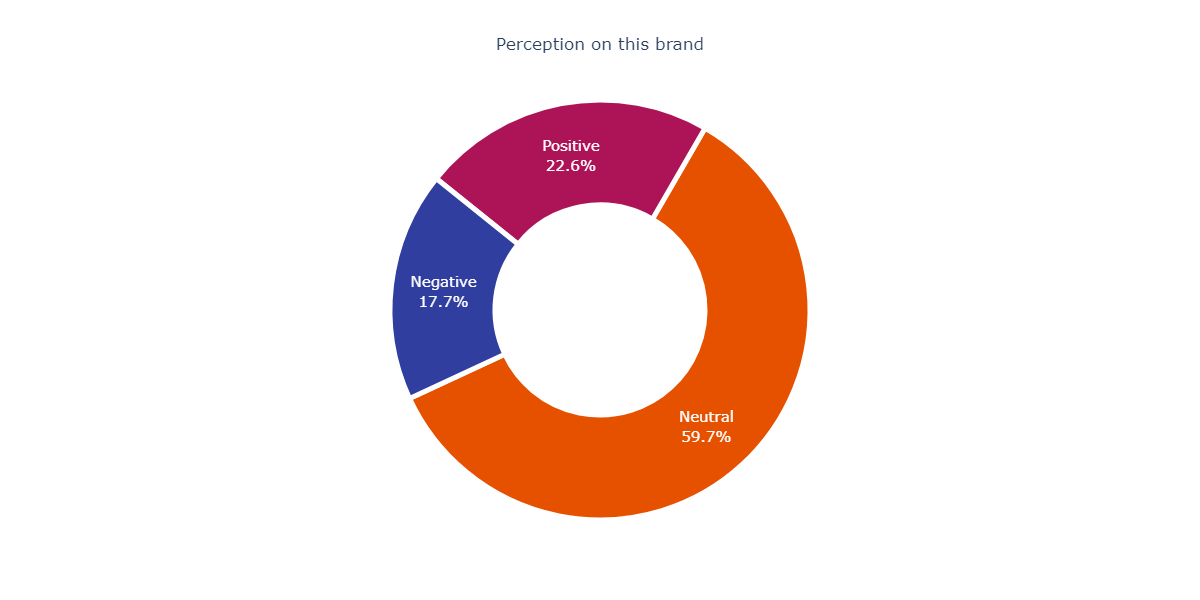

In [65]:
fig = go.Figure()

fig.add_trace(
    go.Pie(labels =percep_df['perception'], values = percep_df['count'])
)

fig.update_traces(textinfo='label+percent',textfont_size=15,
                  hole = 0.5,
                  insidetextorientation='horizontal',
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue'],colors['gray'],colors['sky']],
                              line = dict(color=colors['white'],width=5)),
                  showlegend=False,
                  rotation = 30)

fig.update_layout(title_text='Perception on this brand', title_x=0.5)

fig.show()

In [66]:
data['City'].value_counts()

Bangalore    2828
Hyderabad    1833
Mumbai       1510
Chennai       937
Pune          906
Kolkata       566
Ahmedabad     456
Delhi         429
Jaipur        360
Lucknow       175
Name: City, dtype: int64

In [67]:
grouped_data=data.groupby(['City','Brand_perception']).size().reset_index(name='Count')
grouped_data

,City,Brand_perception,Count
0,Ahmedabad,Negative,149
1,Ahmedabad,Neutral,208
2,Ahmedabad,Positive,99
3,Bangalore,Negative,418
4,Bangalore,Neutral,1844
5,Bangalore,Positive,566
6,Chennai,Negative,126
7,Chennai,Neutral,615
8,Chennai,Positive,196
9,Delhi,Negative,74


In [68]:
pivot_data = grouped_data.pivot(index='City', columns='Brand_perception', values='Count')
pivot_data.style.background_gradient(cmap='Greens')

Brand_perception,Negative,Neutral,Positive
City,,,
Ahmedabad,149,208,99
Bangalore,418,1844,566
Chennai,126,615,196
Delhi,74,210,145
Hyderabad,266,1191,376
Jaipur,106,163,91
Kolkata,67,393,106
Lucknow,53,84,38
Mumbai,228,847,435


In [69]:
total = pivot_data.sum(axis=1).astype(int)
total

City
Ahmedabad     456
Bangalore    2828
Chennai       937
Delhi         429
Hyderabad    1833
Jaipur        360
Kolkata       566
Lucknow       175
Mumbai       1510
Pune          906
dtype: int32

In [70]:
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.astype(int)
pivot_data

Brand_perception,Negative,Neutral,Positive,Total
City,,,,
Ahmedabad,149,208,99,456
Bangalore,418,1844,566,2828
Chennai,126,615,196,937
Delhi,74,210,145,429
Hyderabad,266,1191,376,1833
Jaipur,106,163,91,360
Kolkata,67,393,106,566
Lucknow,53,84,38,175
Mumbai,228,847,435,1510


In [71]:
pivot_data['positive_per'] = (pivot_data['Positive']/pivot_data['Total'])*100
pivot_data['positive_per'] = pivot_data['positive_per'].apply(lambda x: f'{x:.2f}')
pivot_data=pivot_data.sort_values('positive_per',ascending=False).astype(float)
pivot_data.style.background_gradient(cmap='Greens')

Brand_perception,Negative,Neutral,Positive,Total,positive_per
City,,,,,
Delhi,74.000000,210.000000,145.000000,429.000000,33.800000
Mumbai,228.000000,847.000000,435.000000,1510.000000,28.810000
Jaipur,106.000000,163.000000,91.000000,360.000000,25.280000
Pune,282.000000,419.000000,205.000000,906.000000,22.630000
Ahmedabad,149.000000,208.000000,99.000000,456.000000,21.710000
Lucknow,53.000000,84.000000,38.000000,175.000000,21.710000
Chennai,126.000000,615.000000,196.000000,937.000000,20.920000
Hyderabad,266.000000,1191.000000,376.000000,1833.000000,20.510000
Bangalore,418.000000,1844.000000,566.000000,2828.000000,20.010000


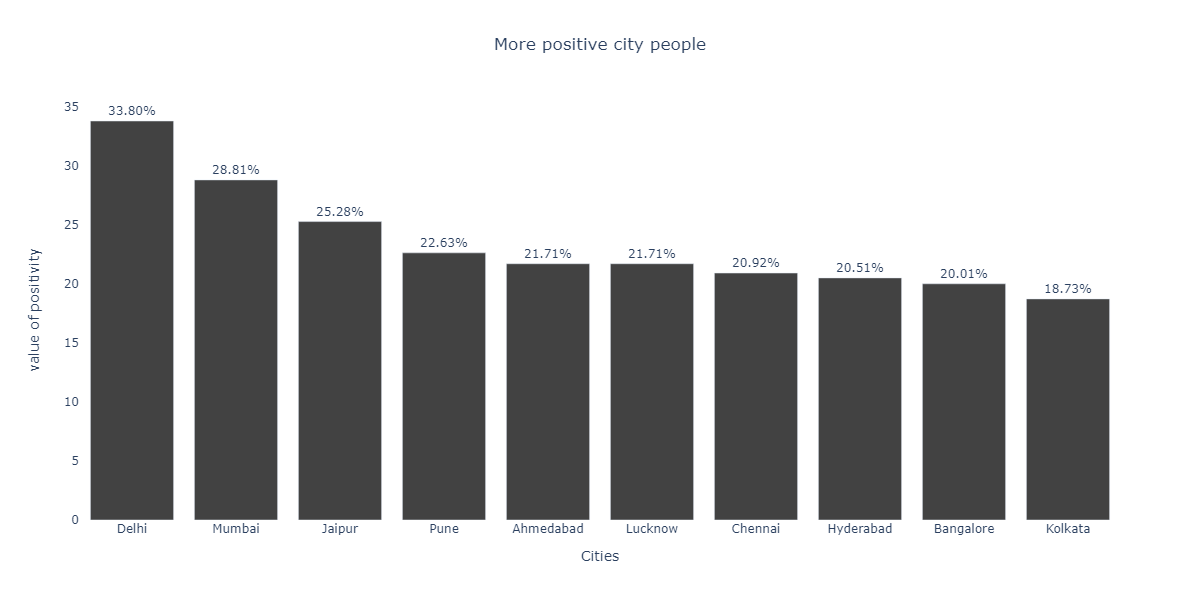

In [72]:
fig=go.Figure()

fig.add_trace(
    go.Bar(x=pivot_data.index,y=pivot_data['positive_per'],
           text=pivot_data['positive_per'].apply(lambda x: f'{x:.2f}%'),
           textposition='outside')
)

fig.update_traces(marker=dict(color=colors['gray']))

fig.update_layout(title_text='More positive city people', title_x = 0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='Cities')
fig.update_yaxes(title_text='value of positivity')

fig.show()

In [73]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [74]:
location=data['Purchase_location'].value_counts()
location =  pd.DataFrame(location).reset_index()
location.columns=['place','count']
location

,place,count
0,Supermarkets,4494
1,Online retailers,2550
2,Gyms and fitness centers,1464
3,Local stores,813
4,Other,679


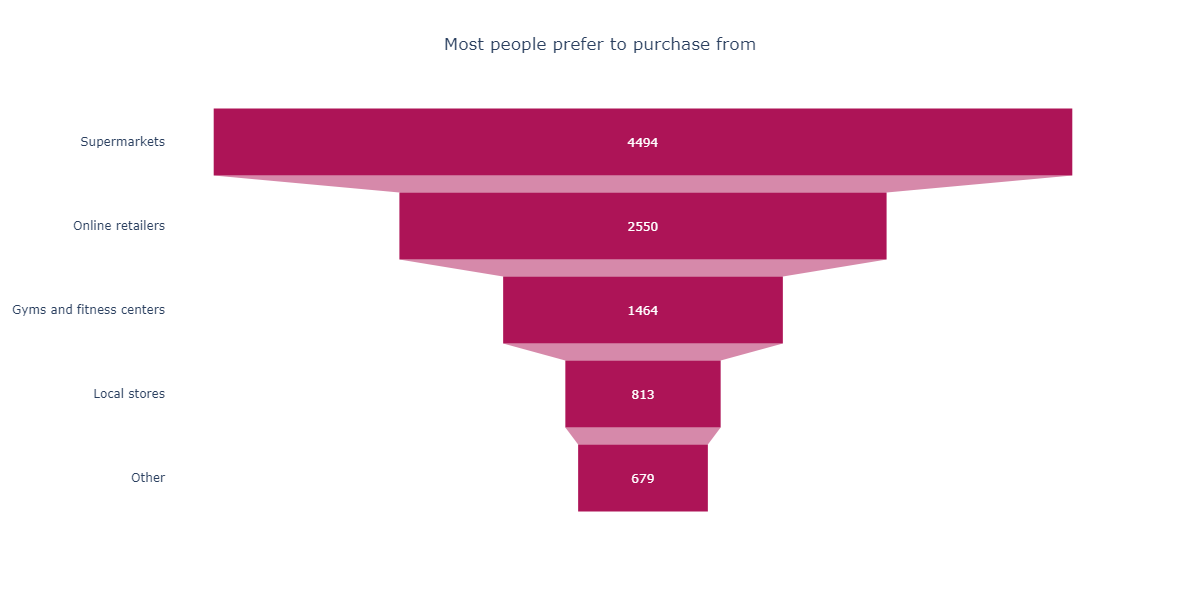

In [75]:
fig=go.Figure()

fig.add_trace(
    go.Funnel(y=location['place'],x=location['count'])
)

fig.update_traces(marker=dict(color=colors['pink']))

fig.update_layout(title_text='Most people prefer to purchase from', title_x = 0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.show()

In [76]:
time = data['Typical_consumption_situations'].value_counts()
time=pd.DataFrame(time).reset_index()
time.columns=['situation','count']
time

,situation,count
0,Sports/exercise,4494
1,Studying/working late,3231
2,Social outings/parties,1487
3,Other,491
4,Driving/commuting,297


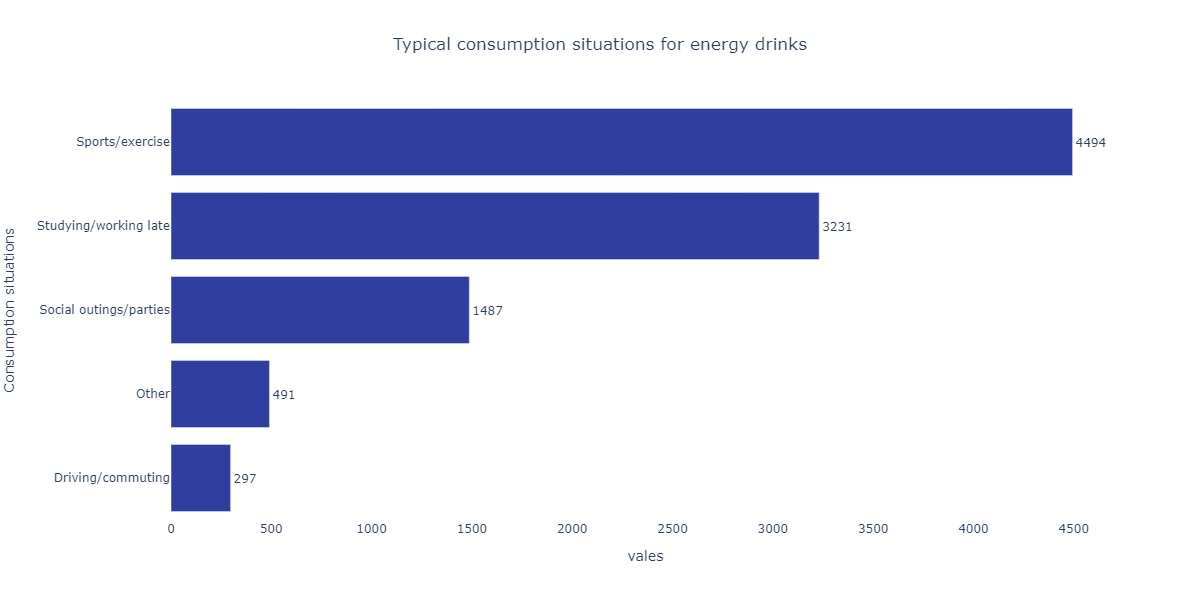

In [77]:
fig=go.Figure()

fig.add_trace(
    go.Bar(x=time['count'],y=time['situation'],
           text=time['count'],
           textposition='outside',
           orientation='h')
)

fig.update_traces(marker=dict(color=colors['blue']))

fig.update_layout(title_text='Typical consumption situations for energy drinks', title_x = 0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='vales')
fig.update_yaxes(title_text='Consumption situations',categoryorder='total ascending')

fig.show()

In [78]:
price=data['Price_range'].value_counts()
price=pd.DataFrame(price).reset_index()
price.columns=['price preference','count']
price

,price preference,count
0,50-99,4288
1,100-150,3142
2,Above 150,1561
3,Below 50,1009


In [79]:
data['Limited_edition_packaging'].value_counts()

No          4023
Yes         3946
Not Sure    2031
Name: Limited_edition_packaging, dtype: int64

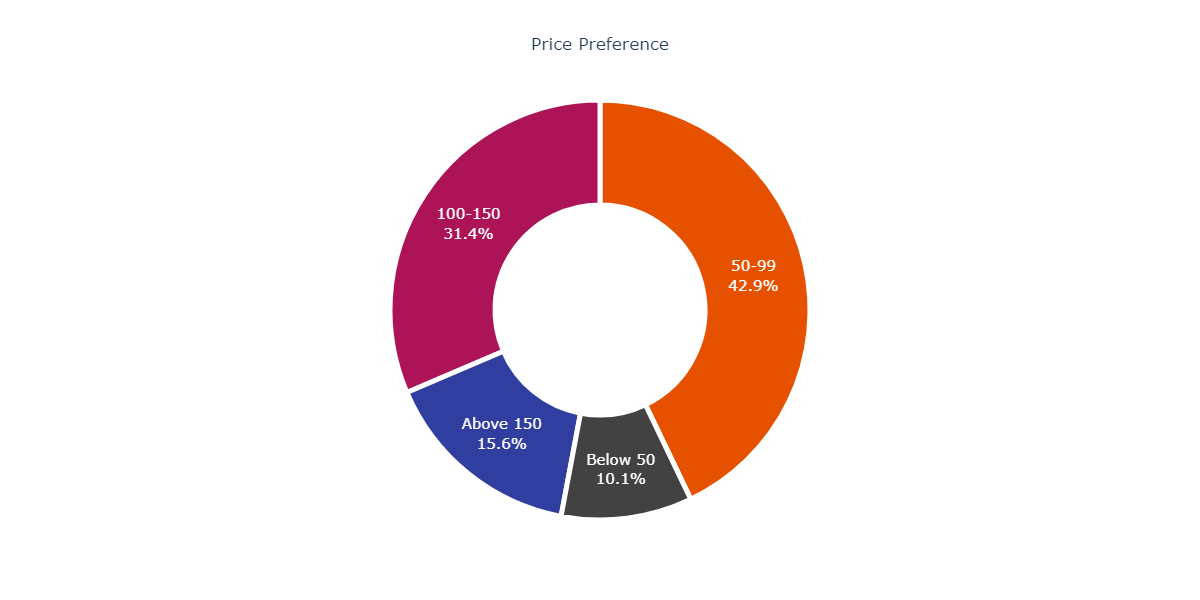

In [80]:
fig = go.Figure()

fig.add_trace(
    go.Pie(labels =price['price preference'], values = price['count'])
)

fig.update_traces(textinfo='label+percent',textfont_size=15,
                  hole = 0.5,
#                   insidetextorientation='horizontal',
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue'],colors['gray'],colors['sky']],
                              line = dict(color=colors['white'],width=5)),
                  showlegend=False,
                  rotation = 0)

fig.update_layout(title_text='Price Preference', title_x=0.5)

fig.show()

In [81]:
data.columns

Index(['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Age', 'Gender',
       'City'],
      dtype='object')

In [82]:
preventing=data['Reasons_preventing_trying'].value_counts()
preventing=pd.DataFrame(preventing).reset_index()
preventing.columns=['reason','count']
preventing

,reason,count
0,Not available locally,2431
1,Health concerns,2258
2,Not interested in energy drinks,2193
3,Unfamiliar with the brand,1850
4,Other,1268


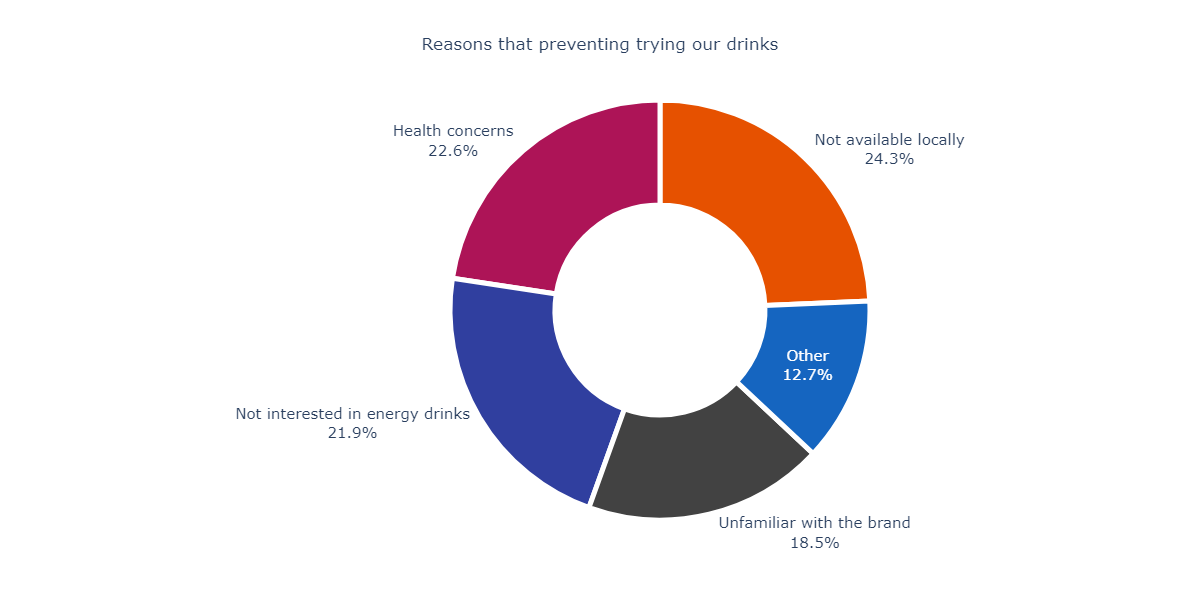

In [83]:
fig = go.Figure()

fig.add_trace(
    go.Pie(labels =preventing['reason'], values = preventing['count'])
)

fig.update_traces(textinfo='label+percent',textfont_size=15,
                  hole = 0.5,
                   insidetextorientation='horizontal',
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue'],colors['gray'],colors['sky']],
                              line = dict(color=colors['white'],width=5)),
                  showlegend=False,
                  rotation = 0)

fig.update_layout(title_text='Reasons that preventing trying our drinks', title_x=0.5)

fig.show()